# Welcome to my Supervised Machine Learning project!

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Loading, exploring & extracting features from the Dataset

In [2]:
dating = pd.read_csv('speeddating.csv')

C:\Users\morga\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: int64(7), object(116)
memory usage: 7.9+ MB


In [4]:
dating.isnull().sum(axis = 0)

has_null              0
wave                  0
gender                0
age                   0
age_o                 0
                     ..
d_guess_prob_liked    0
met                   0
decision              0
decision_o            0
match                 0
Length: 123, dtype: int64

In [5]:
dating.isnull().any(axis=1).sum()

0

In [6]:
dating.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1


In [7]:
# I look at the balance of classes in my target feature
dating.match.value_counts()

0    6998
1    1380
Name: match, dtype: int64

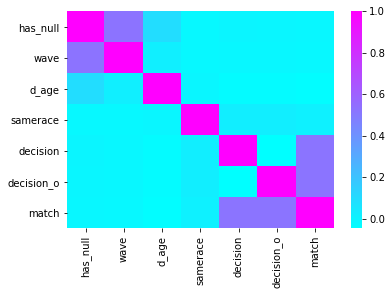

In [8]:
#I evaluate if the columns in this dataset are strongly correlated
corr = dating.corr()
sns.heatmap(corr, cmap="cool")

In [9]:
dating.met.value_counts()

0    7644
?     375
1     351
7       3
5       2
3       1
6       1
8       1
Name: met, dtype: int64

In [10]:
# I look at the names of columns
dating.columns.values

array(['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age',
       'race', 'race_o', 'samerace', 'importance_same_race',
       'importance_same_religion', 'd_importance_same_race',
       'd_importance_same_religion', 'field', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests',
       'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence',
       'd_pref_o_funny', 'd_pref_o_ambitious',
       'd_pref_o_shared_interests', 'attractive_o', 'sinsere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o',
       'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o',
       'd_ambitous_o', 'd_shared_interests_o', 'attractive_important',
       'sincere_important', 'intellicence_important', 'funny_important',
       'ambtition_important', 'shared_interests_important',
       'd_attractive_important', 'd_sincere_important',
       'd_intellicence_impor

In [11]:
#I drop all columns regarding the expectactions of the person in date
dating.drop(columns = ['expected_happy_with_sd_people', 'expected_num_interested_in_me','expected_num_matches', 
                       'd_expected_happy_with_sd_people','d_expected_num_interested_in_me', 'd_expected_num_matches'], inplace = True)

In [12]:
#I drop the columns about 'decision' as the machine will naturally base on to consider the prediction of matching
dating.drop(columns = ['decision', 'decision_o'], inplace = True)

In [13]:
#I drop the columns with duplicata and included information on main features (info reg. self rating and the other person's rates, guessing rates)
dating.drop(columns = ['age_o','d_age','field', 'race', 'race_o','tvsports', 'exercise', 'museums','hiking', 'gaming', 'movies', 
                       'concerts', 'shopping', 'yoga', 'sports', 'dining', 'art', 'clubbing', 'reading', 'tv', 'theater', 
                       'music', 'interests_correlate','importance_same_race', 'importance_same_religion', 'pref_o_attractive', 
                       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
                       'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 
                       'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 
                       'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 
                       'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 
                       'ambition_partner', 'shared_interests_partner', 'guess_prob_liked', 'like'], inplace = True)

In [14]:
# All columns started with 'd_' are rates classification 
# so I decide to look at those should be identified as not started by 'd_'
no_d_colnames = []
for col in dating.columns:
    if not col.startswith('d_'):
        no_d_colnames.append(col)
print(no_d_colnames)# test a list comprehension

['has_null', 'wave', 'gender', 'age', 'samerace', 'met', 'match']


In [15]:
dating.columns

Index(['has_null', 'wave', 'gender', 'age', 'd_d_age', 'samerace',
       'd_importance_same_race', 'd_importance_same_religion',
       'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence',
       'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests',
       'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o',
       'd_ambitous_o', 'd_shared_interests_o', 'd_attractive_important',
       'd_sincere_important', 'd_intellicence_important', 'd_funny_important',
       'd_ambtition_important', 'd_shared_interests_important', 'd_attractive',
       'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
       'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner',
       'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner',
       'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums',
       'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv',
       'd_theater', 'd_movies', 'd_concerts', 'd

In [16]:
#I consider that information regarding the other  and the rating on interest topics are not relevant in the dataset
dating.drop(columns = ['d_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence',
       'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests',
       'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o',
       'd_ambitous_o', 'd_shared_interests_o', 'd_tvsports', 'd_exercise', 'd_museums',
       'd_hiking', 'd_gaming', 'd_theater', 'd_movies', 'd_concerts', 'd_shopping',
       'd_yoga', 'd_attractive', 'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition', 'd_guess_prob_liked',
        'd_sports', 'd_dining', 'd_art', 'd_clubbing', 'd_reading', 'd_tv', 'd_music'], inplace = True)

In [17]:
#I identify the '?' values number by feature
dating.eq('?').sum()

C:\Users\morga\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


has_null                          0
wave                              0
gender                            0
age                              95
d_d_age                           0
samerace                          0
d_importance_same_race            0
d_importance_same_religion        0
d_attractive_important            0
d_sincere_important               0
d_intellicence_important          0
d_funny_important                 0
d_ambtition_important             0
d_shared_interests_important      0
d_attractive_partner              0
d_sincere_partner                 0
d_intelligence_partner            0
d_funny_partner                   0
d_ambition_partner                0
d_shared_interests_partner        0
d_interests_correlate             0
d_like                            0
met                             375
match                             0
dtype: int64

In [18]:
# I drop the rows with the '?' values 
# dating.drop(dating.index[dating['age']== '?'], inplace = True)  
dating = dating[dating.age != '?']
# dating.drop(dating.index[dating['met']== '?'], inplace = True)
dating = dating[dating.met != '?']

In [19]:
# I rename some columns names
dating.rename(columns={'d_intellicence_important':'d_intelligence_important', 'd_ambtition_important': 'd_ambition_important', 'met':'already_met'},inplace=True)

In [20]:
#I explore again the dataset after those changes
dating.shape

(7921, 24)

In [21]:
dating.match.value_counts()

0    6591
1    1330
Name: match, dtype: int64

In [22]:
dating.head() #dating.columns ou affichage columns in a whole

,has_null,wave,gender,age,d_d_age,samerace,d_importance_same_race,d_importance_same_religion,d_attractive_important,d_sincere_important,...,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,d_interests_correlate,d_like,already_met,match
0,0,1,female,21,[4-6],0,[2-5],[2-5],[0-15],[16-20],...,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],[0-0.33],[6-8],0,0
1,0,1,female,21,[0-1],0,[2-5],[2-5],[0-15],[16-20],...,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],[0.33-1],[6-8],1,0
2,1,1,female,21,[0-1],1,[2-5],[2-5],[0-15],[16-20],...,[0-5],[6-8],[9-10],[6-8],[0-5],[6-8],[0-0.33],[6-8],1,1
3,0,1,female,21,[2-3],0,[2-5],[2-5],[0-15],[16-20],...,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[0.33-1],[6-8],0,1
4,0,1,female,21,[2-3],0,[2-5],[2-5],[0-15],[16-20],...,[0-5],[6-8],[6-8],[6-8],[6-8],[6-8],[0-0.33],[6-8],0,1


In [23]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7921 entries, 0 to 8377
Data columns (total 24 columns):
has_null                        7921 non-null int64
wave                            7921 non-null int64
gender                          7921 non-null object
age                             7921 non-null object
d_d_age                         7921 non-null object
samerace                        7921 non-null int64
d_importance_same_race          7921 non-null object
d_importance_same_religion      7921 non-null object
d_attractive_important          7921 non-null object
d_sincere_important             7921 non-null object
d_intelligence_important        7921 non-null object
d_funny_important               7921 non-null object
d_ambition_important            7921 non-null object
d_shared_interests_important    7921 non-null object
d_attractive_partner            7921 non-null object
d_sincere_partner               7921 non-null object
d_intelligence_partner          7921 non-null ob

In [24]:
dating.d_interests_correlate.value_counts()

[0-0.33]    2916
[0.33-1]    2783
[-1-0]      2222
Name: d_interests_correlate, dtype: int64

In [25]:
dating.d_d_age.value_counts()

[2-3]     2301
[4-6]     2210
[0-1]     2137
[7-37]    1273
Name: d_d_age, dtype: int64

In [26]:
dating.d_like.value_counts()

[6-8]     4682
[0-5]     2655
[9-10]     584
Name: d_like, dtype: int64

In [27]:
dating.d_attractive_partner.value_counts()

[6-8]     4388
[0-5]     2692
[9-10]     841
Name: d_attractive_partner, dtype: int64

In [28]:
dating.d_funny_partner.value_counts()

[6-8]     4513
[0-5]     2459
[9-10]     949
Name: d_funny_partner, dtype: int64

In [29]:
dating['age']=pd.to_numeric(dating['age'])
dating.age.dtypes

dtype('int64')

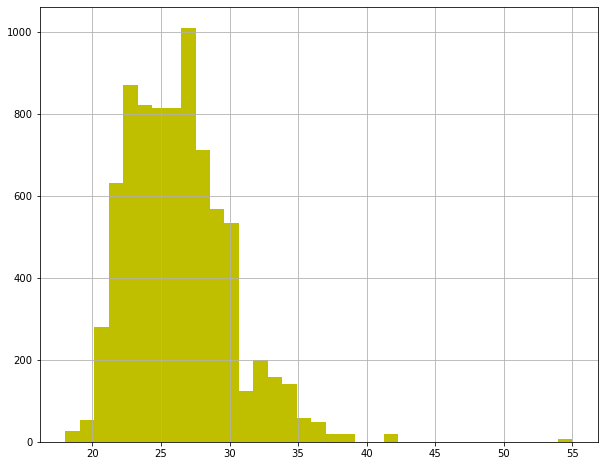

In [30]:
dating['age'].hist(bins=35, color = 'y', figsize=(10, 8))

In [31]:
dating['already_met']=pd.to_numeric(dating['already_met'])
dating.already_met.dtypes

dtype('int64')

In [32]:
# I label values in order to normalize the ranking values, convert to integer, on a scale of 10

In [33]:
age_scale = {'[0-1]': int(0), '[2-3]': int(2), '[4-6]': int(5), '[7-37]': 7} #d_d_age column

In [34]:
importance = {'[0-1]': int(0), '[2-5]': int(5), '[6-10]': int(10)} #d_importance_same_race, d_importance_same_religion
dating['d_importance_same_race'] = dating['d_importance_same_race'].map(importance)
dating['d_importance_same_religion'] = dating['d_importance_same_religion'].map(importance)

In [35]:
rate = {'[0-5]': 3, '[6-8]' : 7, '[9-10]': 10}
rating_cols = ['d_like', 'd_attractive_partner', 'd_sincere_partner', 
               'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner']
for col in rating_cols:
        dating[col] = dating[col].map(rate)

In [36]:
criteria ={'[0-15]':0, '[16-20]': 2, '[21-100]': 8}       
crit_cols = ['d_attractive_important', 'd_sincere_important', 'd_intelligence_important', 
             'd_funny_important', 'd_ambition_important', 'd_shared_interests_important']
for col in crit_cols:
        dating[col] = dating[col].map(criteria)

In [37]:
correlate ={'[-1-0]':int(0), '[0-0.33]':int(3), '[0.33-1]':int(8)} #d_interests_correlate
dating['d_interests_correlate'] = dating['d_interests_correlate'].map(correlate)   

In [38]:
dating.dtypes

has_null                         int64
wave                             int64
gender                          object
age                              int64
d_d_age                         object
samerace                         int64
d_importance_same_race           int64
d_importance_same_religion       int64
d_attractive_important           int64
d_sincere_important              int64
d_intelligence_important         int64
d_funny_important                int64
d_ambition_important             int64
d_shared_interests_important     int64
d_attractive_partner             int64
d_sincere_partner                int64
d_intelligence_partner           int64
d_funny_partner                  int64
d_ambition_partner               int64
d_shared_interests_partner       int64
d_interests_correlate            int64
d_like                           int64
already_met                      int64
match                            int64
dtype: object

In [39]:
# I prepare the dataset

In [40]:
x_columns = [col for col in dating.columns.values if col != "match"]
dating_variables = dating[x_columns]
dating_y = dating["match"] # target

In [41]:
dating_x = pd.get_dummies(data=dating_variables, columns=['gender', 'd_d_age'], drop_first= True)
dating_x.head()

,has_null,wave,age,samerace,d_importance_same_race,d_importance_same_religion,d_attractive_important,d_sincere_important,d_intelligence_important,d_funny_important,...,d_funny_partner,d_ambition_partner,d_shared_interests_partner,d_interests_correlate,d_like,already_met,gender_male,d_d_age_[2-3],d_d_age_[4-6],d_d_age_[7-37]
0,0,1,21,0,5,5,0,2,2,0,...,7,7,3,3,7,0,0,0,1,0
1,0,1,21,0,5,5,0,2,2,0,...,7,3,7,8,7,1,0,0,0,0
2,1,1,21,1,5,5,0,2,2,0,...,7,3,7,3,7,1,0,0,0,0
3,0,1,21,0,5,5,0,2,2,0,...,7,7,7,8,7,0,0,1,0,0
4,0,1,21,0,5,5,0,2,2,0,...,7,7,7,3,7,0,0,1,0,0


In [42]:
dating_x.gender_male.value_counts()

1    3974
0    3947
Name: gender_male, dtype: int64

In [43]:
# I only keep one feature regarding the gender to avoid multi-colinearity

In [44]:
dating.shape

(7921, 24)

# 2. Performing Supervised Learning on the Dataset¶

In [45]:
# I split the dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dating_x, dating_y, test_size=0.2)

In [46]:
# I can cross validate the models but as far I don't master each of them I'd rather perform each model on the dataset

# The logistic regression model

In [47]:
# Testing on logistic regression model & obtaining quality metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

# Init
dating_log = LogisticRegression()
#cross_log = cross_val_score(dating_log, X_train, y_train, cv = 5)

In [48]:
dating_log.fit(X_train, y_train)

# J'entraine
dating_log.fit(X_train, y_train)

# Je prédis sur le train
y_pred_train = dating_log.predict(X_train)

# Je regarde les métriques sur le train
print("Stats sur le train")
precision_recall_fscore_support(y_train, y_pred_train, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None)

C:\Users\morga\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\morga\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Stats sur le train


(array([0.84397394, 0.43367347]),
 array([0.97902891, 0.08149569]),
 array([0.90649873, 0.13720743]),
 array([5293, 1043], dtype=int64))

In [49]:
train_log_conf = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix on 'logistic regression' train set")
print(train_log_conf)

# Je prédis sur le test
y_pred_test = dating_log.predict(X_test)

# Je regarde les métriques sur le test
print("Stats sur le test")
precision_recall_fscore_support(y_test, y_pred_test, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None)

Confusion Matrix on 'logistic regression' train set
[[5182  111]
 [ 958   85]]
Stats sur le test


(array([0.83213586, 0.55555556]),
 array([0.98151002, 0.10452962]),
 array([0.90067162, 0.17595308]),
 array([1298,  287], dtype=int64))

In [50]:
test_log_conf = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix on 'logistic regression' test set")
print(test_log_conf)

Confusion Matrix on 'logistic regression' test set
[[1274   24]
 [ 257   30]]


In [51]:
Log_conf = train_log_conf / len(X_train) * 100

In [52]:
#The first entry in our matrix is the number of observations correctly classified as 0 (or failure). 
#The second entry in the matrix are all entries incorrectly classified as 1 (or success). 
#The third entry contains the count of all observations incorrectly classified as zero (or failure). 
#The last entry contains the count of observations correctly classified as 1. 
#Our goal is to maximize the first and last entries (the correctly classified observations) and minimize the incorrectly classified information. 
#As we can see, out of 1585 observations, 1329 (or 83,8%) are correctly classified.

# The random forest classifier model

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Init
dating_rf = RandomForestClassifier()
#cross_rf = cross_val_score(dating_rf, X_train, y_train, cv = 5)

In [54]:
# J'entraine
dating_rf = dating_rf.fit(X_train, y_train)

# Je prédis sur le train
y_pred_train = dating_rf.predict(X_train)

# Je regarde les métriques sur le train
print("Stats sur le train")
precision_recall_fscore_support(y_train, y_pred_train, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None)

Stats sur le train


C:\Users\morga\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(array([0.97847866, 0.97991543]),
 array([0.99641035, 0.88878236]),
 array([0.9873631, 0.9321267]),
 array([5293, 1043], dtype=int64))

In [55]:
from sklearn.metrics import precision_score, recall_score

rf_precision = precision_score(y_train, y_pred_train)
rf_recall = recall_score(y_train, y_pred_train)

print('The train RF precision score is', rf_precision)
print('The train RF recall score is', rf_recall)

The train RF precision score is 0.9799154334038055
The train RF recall score is 0.8887823585810163


In [56]:
train_rf_conf = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix on 'random forest' train set")
print(train_rf_conf)


# Je prédis sur le test
y_pred_test = dating_rf.predict(X_test)

# Je regarde les métriques sur le test
print("Stats sur le test")
precision_recall_fscore_support(y_test, y_pred_test, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None)

Confusion Matrix on 'random forest' train set
[[5274   19]
 [ 116  927]]
Stats sur le test


(array([0.84232082, 0.46666667]),
 array([0.95069337, 0.19512195]),
 array([0.89323199, 0.27518428]),
 array([1298,  287], dtype=int64))

In [57]:
rf_precision = precision_score(y_test, y_pred_test)
rf_recall = recall_score(y_test, y_pred_test)

print('The test RF precision score is', rf_precision)
print('The test RF recall score is', rf_recall)

The test RF precision score is 0.4666666666666667
The test RF recall score is 0.1951219512195122


In [58]:
test_rf_conf = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix on 'random forest' test set")
print(test_rf_conf)

Confusion Matrix on 'random forest' test set
[[1234   64]
 [ 231   56]]


In [59]:
RF_conf = train_rf_conf / len(X_train) * 100

In [60]:
precision_recall_fscore_support(y_test, y_pred_test, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None)


(array([0.84232082, 0.46666667]),
 array([0.95069337, 0.19512195]),
 array([0.89323199, 0.27518428]),
 array([1298,  287], dtype=int64))

In [61]:
#As we can see, out of 1585 observations, 1310 (or 82,6 %) are correctly classified.

# The Kneighbors classifier model

In [65]:
from sklearn.neighbors import KNeighborsClassifier

# Init
dating_KN = KNeighborsClassifier(n_neighbors=5) 
cross_KN = cross_val_score(dating_KN, X_train, y_train, cv = 5)

In [66]:
cross_KN

array([0.82807571, 0.82176656, 0.84148265, 0.81832543, 0.81990521])

In [67]:
# J'entraine
dating_KN.fit(X_train, y_train) 

# Je prédis sur le train
y_pred_train = dating_KN.predict(X_train)

# Je regarde les métriques sur le train
print("Metrics on the train")
print(precision_recall_fscore_support(y_train, y_pred_train, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None))

train_KN_conf = confusion_matrix(y_train, y_pred_train)#/ len(X_train) * 100
print("Confusion Matrix on 'Kneighbors' train set")
print(train_KN_conf)

# Je prédis sur le test
y_pred_test = dating_KN.predict(X_test)

# Je regarde les métriques sur le test
print("Stats sur le test")
print(precision_recall_fscore_support(y_test, y_pred_test, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None))

test_KN_conf = confusion_matrix(y_test, y_pred_test)#/ len(X_test) * 100
print("Confusion Matrix on 'Kneighbors' test set")
print(test_KN_conf)

Metrics on the train
(array([0.88534483, 0.70522388]), array([0.97014925, 0.36241611]), array([0.92580907, 0.47878404]), array([5293, 1043], dtype=int64))
Confusion Matrix on 'Kneighbors' train set
[[5135  158]
 [ 665  378]]
Stats sur le test
(array([0.8449235 , 0.43537415]), array([0.93605547, 0.22299652]), array([0.88815789, 0.29493088]), array([1298,  287], dtype=int64))
Confusion Matrix on 'Kneighbors' test set
[[1215   83]
 [ 223   64]]


In [68]:
KN_conf = train_KN_conf / len(X_train) * 100

# 3. Choosing & deploying the model

# Displaying a heatmap on each confusion matrix

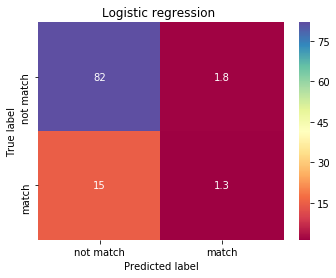

In [69]:
# I plot the confusion matrix of the train set on Logistic regression model

cm_df = pd.DataFrame(Log_conf,
                     index = ['not match','match'], 
                     columns = ['not match','match'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, cmap = 'Spectral', annot=True)
plt.title('Logistic regression ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [70]:
Log_conf

array([[81.78661616,  1.75189394],
       [15.11994949,  1.3415404 ]])

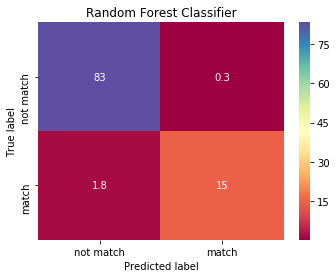

In [71]:
# I plot the confusion matrix of the train set on random forest classifier model

cm_df = pd.DataFrame(RF_conf,
                     index = ['not match','match'], 
                     columns = ['not match','match'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, cmap = 'Spectral', annot = True)
plt.title('Random Forest Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [72]:
RF_conf

array([[83.23863636,  0.29987374],
       [ 1.83080808, 14.63068182]])

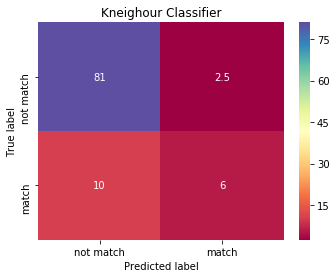

In [73]:
# I plot the confusion matrix of the train set on Kneighbour classifier model

cm_df = pd.DataFrame(KN_conf,
                     index = ['not match','match'], 
                     columns = ['not match','match'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, cmap = 'Spectral', annot=True)
plt.title('Kneighour Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [74]:
KN_conf

array([[81.04482323,  2.49368687],
       [10.49558081,  5.96590909]])

# Further to the presentation to teacher, I tried to process modeling with a modified dataset

In [75]:
#Deleting 2 more features in the dataset -has_null & wave-

In [76]:
new_dating = dating.drop(columns=['has_null', 'wave'])

In [77]:
new_x_columns = [col for col in new_dating.columns.values if col != "match"]
new_dating_variables = new_dating[new_x_columns]
new_dating_y = new_dating["match"] # target

In [78]:
new_dating_x = pd.get_dummies(data=new_dating_variables, columns=['gender', 'd_d_age'], drop_first= True)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(new_dating_x, new_dating_y, test_size=0.2)

In [80]:
new_dating_log = LogisticRegression() 

In [81]:
# J'entraine
new_dating_log.fit(X_train, y_train) 

# Je prédis sur le train
y_pred_train = new_dating_log.predict(X_train)

# Je regarde les métriques sur le train
print("Metrics on the train")
print(precision_recall_fscore_support(y_train, y_pred_train, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None))

train_log_conf = confusion_matrix(y_train, y_pred_train)#/ len(X_train) * 100
print("Confusion Matrix on 'Log Regression' train set")
print(train_log_conf)

# Je prédis sur le test
y_pred_test = new_dating_log.predict(X_test)

# Je regarde les métriques sur le test
print("Stats sur le test")
print(precision_recall_fscore_support(y_test, y_pred_test, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None))

test_log_conf = confusion_matrix(y_test, y_pred_test)#/ len(X_test) * 100
print("Confusion Matrix on 'Log Regression' test set")
print(test_log_conf)

C:\Users\morga\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Metrics on the train
(array([0.84639344, 0.48728814]), array([0.97710068, 0.10931559]), array([0.90706254, 0.17857143]), array([5284, 1052], dtype=int64))
Confusion Matrix on 'Log Regression' train set
[[5163  121]
 [ 937  115]]
Stats sur le test
(array([0.83278903, 0.40740741]), array([0.97551645, 0.07913669]), array([0.89852008, 0.13253012]), array([1307,  278], dtype=int64))
Confusion Matrix on 'Log Regression' test set
[[1275   32]
 [ 256   22]]


In [82]:
Log_conf = train_log_conf / len(X_train) * 100

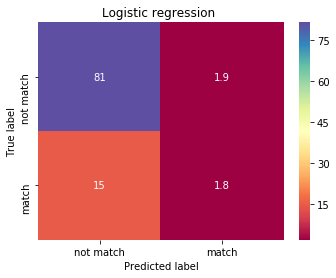

In [83]:
# I plot the confusion matrix of the train set on Logistic regression model

cm_df = pd.DataFrame(Log_conf,
                     index = ['not match','match'], 
                     columns = ['not match','match'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, cmap = 'Spectral', annot=True)
plt.title('Logistic regression ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [84]:
Log_conf

array([[81.48674242,  1.90972222],
       [14.7885101 ,  1.81502525]])

In [85]:
log_precision = precision_score(y_train, y_pred_train)
log_recall = recall_score(y_train, y_pred_train)

print('The train Log Reg precision score is', log_precision)
print('The train Log Reg recall score is', log_recall)

The train Log Reg precision score is 0.4872881355932203
The train Log Reg recall score is 0.10931558935361217


In [86]:
new_dating_RF = RandomForestClassifier() 

In [87]:
# J'entraine
new_dating_RF.fit(X_train, y_train) 

# Je prédis sur le train
y_pred_train = new_dating_RF.predict(X_train)

# Je regarde les métriques sur le train
print("Metrics on the train")
print(precision_recall_fscore_support(y_train, y_pred_train, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None))

train_RF_conf = confusion_matrix(y_train, y_pred_train)#/ len(X_train) * 100
print("Confusion Matrix on 'Random Forest' train set")
print(train_RF_conf)

# Je prédis sur le test
y_pred_test = new_dating_RF.predict(X_test)

# Je regarde les métriques sur le test
print("Stats sur le test")
print(precision_recall_fscore_support(y_test, y_pred_test, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None))

test_RF_conf = confusion_matrix(y_test, y_pred_test)#/ len(X_test) * 100
print("Confusion Matrix on 'Random Forest' test set")
print(test_RF_conf)

Metrics on the train
(array([0.97732342, 0.97280335]), array([0.99507949, 0.88403042]), array([0.98612153, 0.92629482]), array([5284, 1052], dtype=int64))
Confusion Matrix on 'Random Forest' train set
[[5258   26]
 [ 122  930]]
Stats sur le test
(array([0.84136546, 0.45054945]), array([0.96174445, 0.14748201]), array([0.89753659, 0.22222222]), array([1307,  278], dtype=int64))
Confusion Matrix on 'Random Forest' test set
[[1257   50]
 [ 237   41]]


C:\Users\morga\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [88]:
RF_conf = train_RF_conf / len(X_train) * 100

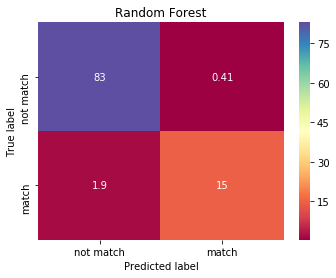

In [89]:
# I plot the confusion matrix of the train set on Logistic regression model

cm_df = pd.DataFrame(RF_conf,
                     index = ['not match','match'], 
                     columns = ['not match','match'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, cmap = 'Spectral', annot=True)
plt.title('Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [90]:
RF_conf

array([[82.98611111,  0.41035354],
       [ 1.92550505, 14.6780303 ]])

In [91]:
rf_precision = precision_score(y_train, y_pred_train)
rf_recall = recall_score(y_train, y_pred_train)

print('The train RF precision score is', rf_precision)
print('The train RF recall score is', rf_recall)

The train RF precision score is 0.9728033472803347
The train RF recall score is 0.8840304182509505


In [92]:
new_dating_KN = KNeighborsClassifier(n_neighbors=5) 

In [93]:
# J'entraine
new_dating_KN.fit(X_train, y_train) 

# Je prédis sur le train
y_pred_train = new_dating_KN.predict(X_train)

# Je regarde les métriques sur le train
print("Metrics on the train")
print(precision_recall_fscore_support(y_train, y_pred_train, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None))

train_KN_conf = confusion_matrix(y_train, y_pred_train)#/ len(X_train) * 100
print("Confusion Matrix on 'Kneighbors' train set")
print(train_KN_conf)

# Je prédis sur le test
y_pred_test = new_dating_KN.predict(X_test)

# Je regarde les métriques sur le test
print("Stats sur le test")
print(precision_recall_fscore_support(y_test, y_pred_test, beta=1.0, 
                                 labels=None, pos_label=1, average=None, 
                                 warn_for=("precision", "recall", "f-score"), sample_weight=None))

test_KN_conf = confusion_matrix(y_test, y_pred_test)#/ len(X_test) * 100
print("Confusion Matrix on 'Kneighbors' test set")
print(test_KN_conf)

Metrics on the train
(array([0.88243336, 0.75206612]), array([0.97728993, 0.3460076 ]), array([0.92744253, 0.47395833]), array([5284, 1052], dtype=int64))
Confusion Matrix on 'Kneighbors' train set
[[5164  120]
 [ 688  364]]
Stats sur le test
(array([0.8443843 , 0.44859813]), array([0.95485845, 0.17266187]), array([0.8962298 , 0.24935065]), array([1307,  278], dtype=int64))
Confusion Matrix on 'Kneighbors' test set
[[1248   59]
 [ 230   48]]


In [94]:
KN_conf = train_KN_conf / len(X_train) * 100

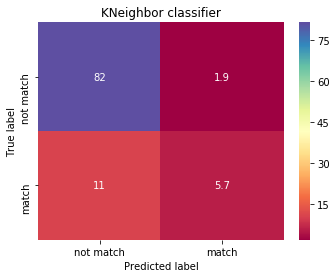

In [95]:
# I plot the confusion matrix of the train set on Logistic regression model

cm_df = pd.DataFrame(KN_conf,
                     index = ['not match','match'], 
                     columns = ['not match','match'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, cmap = 'Spectral', annot=True)
plt.title('KNeighbor classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [96]:
KN_conf

array([[81.50252525,  1.89393939],
       [10.85858586,  5.74494949]])

In [97]:
KN_precision = precision_score(y_train, y_pred_train)
KN_recall = recall_score(y_train, y_pred_train)

print('The train KN precision score is', KN_precision)
print('The train KN recall score is', KN_recall)

The train KN precision score is 0.7520661157024794
The train KN recall score is 0.34600760456273766


In [98]:
#dating_log.intercept_

In [ ]:
#columns = dating.drop("match",axis=1).columns.tolist()

#for col, coef_ in zip(columns, dating_log.coef_[0]):
    #print(col, ':', coef_)